<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


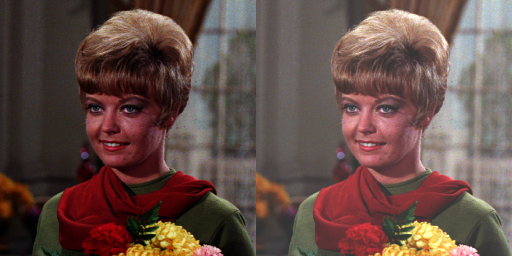

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Week2/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

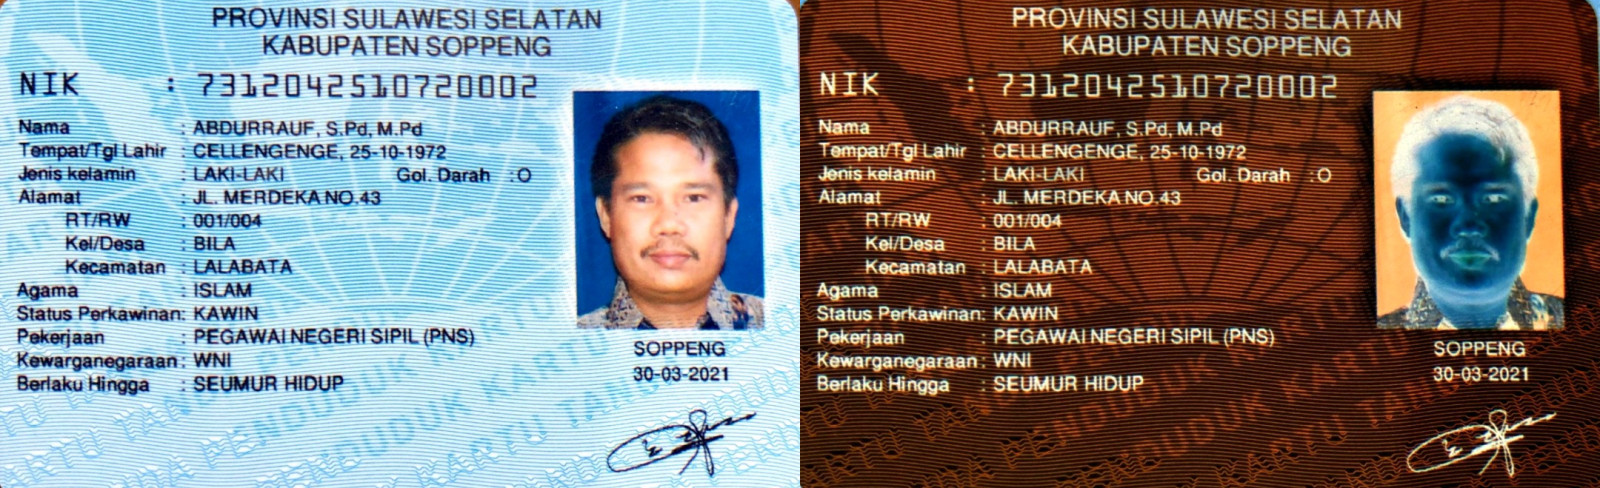

In [4]:
# 1. Inverse Citra

original = cv.imread('/content/drive/MyDrive/KTP_PCVK.jpg')
inverse_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y, x, c] = 255 - original[y, x, c]

final_frame = cv.hconcat([original, inverse_image])
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


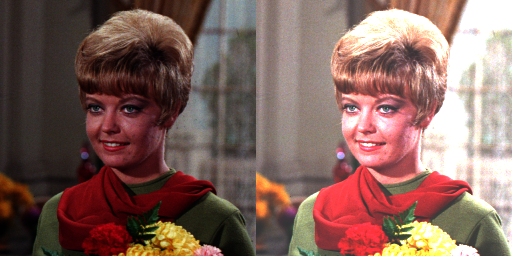

In [23]:
# 2. Transformasi Contrast

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Week2/Images/female.tiff')
brightness_contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      image_value = contrast * original[y, x, c] + brightness
      brightness_contrast_image[y, x, c] = np.clip(image_value, 0, 255)

final_frame = cv.hconcat([original, brightness_contrast_image])
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


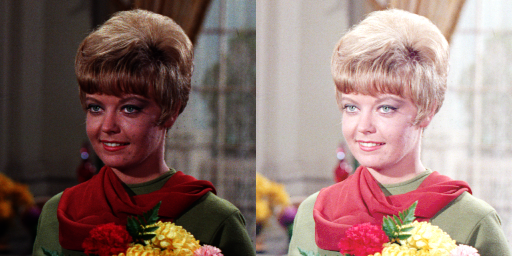

In [24]:
# 3. Transformasi Logarithmic Brightness

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Week2/Images/female.tiff')
log_bright_image = np.zeros_like(original)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      log_bright_image[y, x, c] = np.clip(brightness * np.log1p(original[y, x, c]),0,255)

final_frame = cv.hconcat([original.astype(np.uint8), log_bright_image])
cv2_imshow(final_frame)

Averaging


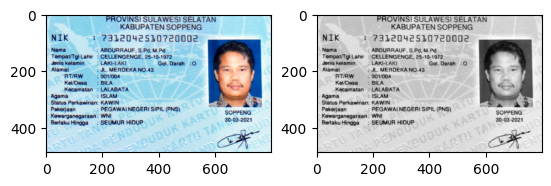

In [29]:
# 4. Grayscale menggunakan metode averaging, lightness, dan luminance

from matplotlib import pyplot as plt

# a) Averaging
print('Averaging')

original = cv.imread('/content/drive/MyDrive/KTP_PCVK.jpg')
grayscale_image = np.zeros(original.shape, original.dtype)

# Mengakses setiap piksel dan menerapkan transformasi
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    r,g,b = original[y,x]
    grayscale_image[y,x] = np.clip(int(np.mean(original[y,x])), 0, 255)

plt.subplot(1, 2, 1)  # 1 row, 2 columns, posisi ke-1
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)  # 1 row, 2 columns, posisi ke-2
plt.imshow(cv.cvtColor(grayscale_image, cv.COLOR_BGR2RGB))
plt.show()

Lightness


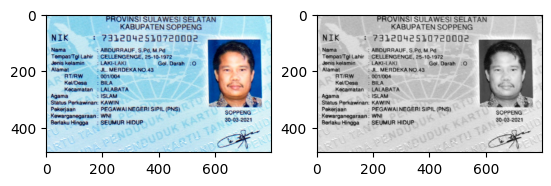

In [30]:
# b) Lightness
print('Lightness')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    grayscale_image[y,x] = np.clip((int(max(original[y,x])) + int(min(original[y,x])))/2, 0, 255)

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(grayscale_image, cv.COLOR_BGR2RGB))
plt.show()

Luminance


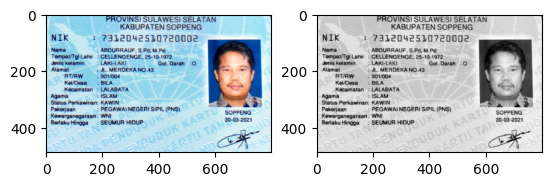

In [31]:
# c) Luminance
print('Luminance')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
   b,g,r = original[y,x]
   grayscale_luminance = (0.21*r) + (0.72*g) + (0.07*b)
   grayscale_image[y,x] = np.clip(grayscale_luminance, 0, 255)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_image, cv.COLOR_BGR2RGB))
plt.show()

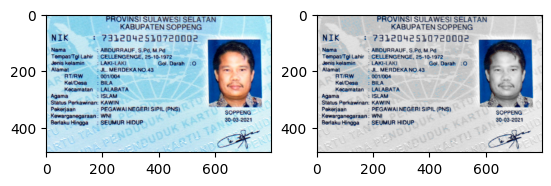

In [33]:
# 5. Grayscale selain warna biru

original = cv.imread('/content/drive/MyDrive/KTP_PCVK.jpg')
grayscale_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        r, g, b = original[y,x]
        if b < 100 :
            grayscale_image[y,x] = [r, g, b]
        else:
            grayscale_value = np.clip(int(np.mean([r, g, b])), 0, 255)
            grayscale_image[y,x] = [grayscale_value, grayscale_value, grayscale_value]

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(grayscale_image, cv.COLOR_BGR2RGB))

plt.show()